# Final Project

## Abstract

In this project, I'd like to reuse the shooting incidents records in the New York City from the previous courses and refine its visualization. 

To recap the analysis, the data includes the number of shooting incidents happened between 2006 and 2021, together with 19 relevant properties associated with each shooting incident.

The goal of this project is to give users an overview and detailed information about shooting incidents happened in New York City over years (2006-2021). Those information include the overall trend, location, characteristics of both perpetrators and victims, and time distribution of shootings in a day and in a month. These are the most attractive parts for users I invited according to the conversations before I started to design the data visualization.


The tasks are summarized as following: 

- The overview of shooting incidents in New York City over years

- The shooting locations in a map

- The characteristics of the perpetrators

- The characteristics of the victims

- The most frequent time of shootings happened in a day and in a month.

## Introduction of the data

The source data is downloaded from the website called "NYC OpenData" and its link is shown as below:

data source: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8.

The source data contains 25596 rows and 19 columns. Every row indicates one of shooting accidents happend between the year 2006 and 2021 and columns suggest 19 aspects about the shootings information, which includes unique ID, date,time, location, characteristics of perpetrators and victims, etc. The first five observations is shown below. 

In [1]:
import pandas as pd
import altair as alt
import geopandas
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import gpdvega
import warnings
import numpy as np
import re
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("NYPD_Shooting_Incident_Data__Historic.csv")
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,226950018,04/14/2021,21:08:00,BRONX,42,0.0,COMMERCIAL BLDG,True,NaN,NaN,NaN,18-24,M,BLACK,1.009489e+06,243050.000,40.833764,-73.908795,POINT (-73.90879517699994 40.83376365400005)
3,237710987,12/10/2021,19:30:00,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.017440e+06,256046.000,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
4,224701998,02/22/2021,00:18:00,MANHATTAN,34,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1.005426e+06,254690.000,40.865723,-73.923441,POINT (-73.92344088699997 40.86572268100008)


## Data Visualization with its Key Elements

### 1. The trend of shooting incidents in New York City over years (2006-2021)

The left graph shows the total number of shooting incidents in NYC over years. I chose a colored stacked bar chart to give users an overview of the trend. The different colors provide them a new dimension of information, i.e. the boroughs, so that the users will know the proportions of the total number clearly. When users place the cursor on the part of the graph they are interested in, there is a label displaying some details of this part.

The graph on the right side is aiming at suggesting the trend of shootings over years by boroughs. Not only do the users have a precise view to see the trend of shootings in a specific borough over years, but they also have an easy approach to compare the number of shooting incidents in each of boroughs as well. When the cursor is moved to points in this graph, the specific number will be shown in a label.

In [3]:
# time vs shooting
data['year'] = data['OCCUR_DATE'].map(lambda x: x.split("/",2)[2])
data_year = data.groupby(['BORO', 'year'])['year'].count().reset_index(name='Number of shootings')

p1 = alt.Chart(data_year).mark_bar().encode(
    x = 'year:N',
    y = 'Number of shootings:Q',
    color = 'BORO:N',
    tooltip = ['BORO:N','Number of shootings:Q']
).properties(
    title = "Number of shootings over years"
)


p2 = alt.Chart(data_year).mark_line(point=alt.OverlayMarkDef()).encode(
    x = 'year:Q',
    y = 'Number of shootings:Q',
    color = 'BORO:N',
    tooltip = ['BORO:N', 'Number of shootings:Q']
).properties(
    title = "Number of shootings by boroughs over years"
)
p1|p2

alt.HConcatChart(...)

### 2. The location of shooting incidents in NYC map

In this graph, the user will gain knowledge about the locations where shooting incidents happened. To well demonstrate the locations, the key elements of this graph are the NYC map and the red points. In this graph, the NYC map is drawn with different colors to show its five distinct boroughs and one red point is indicating the location where one individual shooting incident happened. The more red points are, the more frequent shootings incidents happenened so that the frequency of shooting incidents is also shown in just one map clearly. Users could make their own conclusion about the most high-risk places in this graph as well.

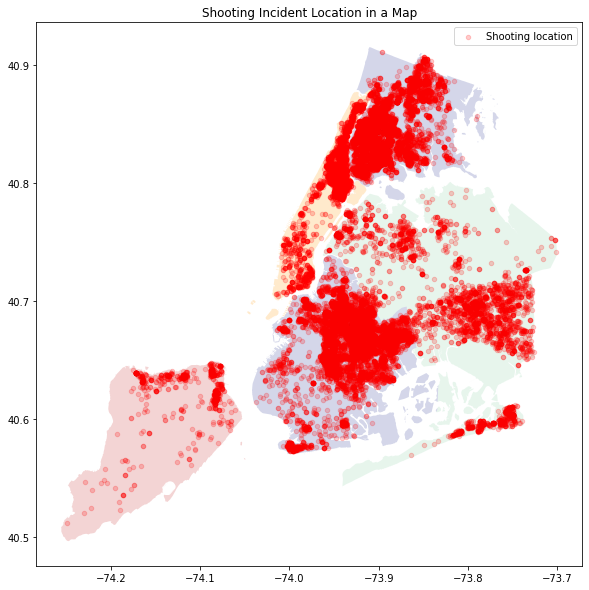

In [4]:

crs={'init':'epsg:4326'}

boros = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boros['color'] = ['#C62828', '#89d0a4', '#283593', '#FF9800', '#283593']

geo_df=geopandas.GeoDataFrame(data,crs=crs,geometry=geopandas.points_from_xy(data["Longitude"], data["Latitude"]))

fig,ax=plt.subplots(figsize=(10,10))
boros.plot(ax=ax,alpha=0.2,color=boros['color'])
geo_df.plot(ax=ax,markersize=20, alpha=0.2,color = "red", label="Shooting location")
plt.legend()
ax.set_title('Shooting Incident Location in a Map');


### 3.  The characteristic of perpetrators in NYC shooting incidents

Besides locations, the perpetrators are also interesting to analyze. The following gragh will show users the perpetrators' age group. The bar chart is good to demonstrate the numbers and making comparision. In this graph, I still chose the bar chart with different color, but at this time, colors are used as a tool to show the distinction of different age groups. According to the bar chart, despites there is a large portion of unknown data, it will be easiler for users to conclude that the age group of 18-24 owns the highest number of shooting incidents, followed by 25-44. Additionally, if users are interested in one specific age group, they can select this age group bar by clicking. And the right side gragh will provide with the racial information in that group. This racial information is also shown by a bar chart which would be a good tool for comparision.

In [5]:
## clean data. Convert NaN to UNKNOWN
data["PERP_AGE_GROUP"] = data["PERP_AGE_GROUP"].replace(np.nan, 'UNKNOWN')
data["PERP_AGE_GROUP"] = data["PERP_AGE_GROUP"].replace(['1020', '940','224'], 'UNKNOWN')  
data_perp = data.groupby(['PERP_AGE_GROUP','PERP_RACE'])['PERP_AGE_GROUP'].count().reset_index(name='Number of shootings')

data["PERP_RACE"] = data["PERP_RACE"].replace(np.nan,"UNKNOWN")

click = alt.selection_multi(encodings=['color'])

p_age_group_race = alt.Chart(data_perp).mark_bar(color = 'purple').encode(
    x= alt.X('PERP_RACE:N',
             title = "The Race of Perpetrators",
             sort=['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER',
                   'BLACK', 'BLACK HISPANIC','WHITE', 'WHITE HISPANIC','UNKNOWN'],
            axis=alt.Axis(labelAngle=-45)),
    y='Number of shootings',
    tooltip = ['Number of shootings:Q']
).transform_filter(
    click
).properties(
    height = 300,
    width = 300,
    title = "Race of Perpetrators"
)

p_age_group = alt.Chart(data_perp).mark_bar().encode(
    x = alt.X('PERP_AGE_GROUP:N',
              title ="The Age Group of Perpetrators",
              sort=['<18','18-24', '25-44', '45-64', '65+', 'UNKNOWN'],
              axis=alt.Axis(labelAngle=-45)),
    y='total_shootings_number:Q',
    tooltip = ['total_shootings_number:Q'],
    color=alt.condition(click, 'PERP_AGE_GROUP', alt.value('lightgray'))    
).transform_aggregate(
    total_shootings_number ='sum(Number of shootings)',
    groupby=["PERP_AGE_GROUP"]
).add_selection(
    click
).properties(
    height = 300,
    width = 300,
    title = "Age Group of Perpetrators"
)

p_age_group | p_age_group_race


alt.HConcatChart(...)

### 4. The gender of the prepetrators

In order to show the portion of each part, it's a good idea to use the pie chart. In this chart, a pie chart is used to show the portions in each gender. And users will gain knowledge to know that males play an important part in shooting incidents. They are more likely to be perpetrators as well as victims. 


In [6]:
## clean data. Convert NaN to UNKNOWN
data["PERP_SEX"] = data["PERP_SEX"].replace(np.nan, 'U')
data["VIC_SEX"] = data["VIC_SEX"].replace(np.nan,"U")

perp_sex = data.groupby(['PERP_SEX'])['PERP_SEX'].count().reset_index(name='Number of shootings')
vic_sex = data.groupby(["VIC_SEX"])["VIC_SEX"].count().reset_index(name="Number of shootings")

sex_p = alt.Chart(perp_sex).mark_arc().encode(
            theta=alt.Theta(field="Number of shootings", type="quantitative"),
            color=alt.Color(field="PERP_SEX", type="nominal"),
            tooltip = ["Number of shootings"],
        ).properties(
                title = "Gender of Perpetrators"
        )

sex_v = alt.Chart(vic_sex).mark_arc().encode(
            theta=alt.Theta(field="Number of shootings", type="quantitative"),
            color=alt.Color(field="VIC_SEX", type="nominal"),
            tooltip = ["Number of shootings"]
        ).properties(
                title = "Gender of Victims"
        )

sex_p|sex_v

alt.HConcatChart(...)

### 5. The characteristic of victims in NYC shooting incidents

The same type of charts are used to show victims' information. Users will gain their knowledge to see the age group distribution and its racial distribution in a specific age group among victims as they can see the graph among perpetrators. Similarly, when users select one age group bar, the right side gragh will provide with the racial information in that group.  

In [7]:
data_vic = data.groupby(['VIC_AGE_GROUP','VIC_RACE'])['VIC_AGE_GROUP'].count().reset_index(name='Number of shootings')

click = alt.selection_multi(encodings=['color'])

v_age_group_race = alt.Chart(data_vic).mark_bar(color = 'purple').encode(
    x= alt.X('VIC_RACE:N',
            axis=alt.Axis(labelAngle=-45),
            sort=['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER',
                   'BLACK', 'BLACK HISPANIC','WHITE', 'WHITE HISPANIC','UNKNOWN'],
            title = "The race of victims"),
    y='Number of shootings',
    tooltip = ['Number of shootings:Q']
).transform_filter(
    click
).properties(
    height = 300,
    width = 300,
    title = "Race of Victims"
)

v_age_group = alt.Chart(data_vic).mark_bar().encode(
    x = alt.X('VIC_AGE_GROUP:N',
              sort=['<18','18-24', '25-44', '45-64', '65+', 'UNKNOWN'],
             axis=alt.Axis(labelAngle=-45),
             title = "The age group of victims"),
    y='total_shootings_number:Q',
    tooltip = ['total_shootings_number:Q'],
    color=alt.condition(click, 'VIC_AGE_GROUP', alt.value('lightgray'))    
).transform_aggregate(
    total_shootings_number ='sum(Number of shootings)',
    groupby=["VIC_AGE_GROUP"]
).add_selection(
    click
).properties(
    height = 300,
    width = 300,
    title = "Age Group of Victims"
)

v_age_group | v_age_group_race

alt.HConcatChart(...)

### 6. The information about time of NYC shooting incidents

The heat map is a good demonstration to see which month in a year would be in a high frequency of shootings in each month of a year. The darker color it is, the more frequent shootings happened. Thus, in this case, the key elements in this graph is x axis(name of months in a year), y axis (each of year), and the saturation of color(indicating the frequency of the incidents).

In [8]:
data['month'] = data['OCCUR_DATE'].map(lambda x:x.split("/",2)[0])
data_month = data.groupby(['year','month'])['month'].count().reset_index(name='Number of shootings')

alt.Chart(data_month).mark_rect().encode(
    alt.X('month:O', title='month'),
    alt.Y('year:O', title='year'),
    alt.Color('Number of shootings:Q', title='Number of Shootings',scale=alt.Scale(scheme='yelloworangebrown')),
    tooltip = ['Number of shootings:Q']
)

alt.Chart(...)

The next graph is more specific on the time in a day when shootings happened. The users will easily to solve the question about when is the potentially most dangerous time in a day. 

In [9]:
data['hour'] = data['OCCUR_TIME'].map(lambda x: x.split(":",2)[0])
data_hour = data.groupby(['year','hour'])['hour'].count().reset_index(name='Number of shootings')


alt.Chart(data_hour).mark_rect().encode(
    alt.X('hour:O', title='hour'),
    alt.Y('year:O', title='year'),
    alt.Color('Number of shootings:Q', title='Number of Shootings',scale=alt.Scale(scheme='yelloworangebrown')),
    tooltip = ['Number of shootings:Q']
)


alt.Chart(...)

## Discussion

To further evaluate my analysis unbiasly, I invited three friends who had no prior knowledge about the dataset to go through my analysis report. I requested feedback mainly on the following questions:

1. Is this data visualization fulfilling your requests about the data?
2. Which part of the analysis do you feel is impressive and informative?
3. Which part of the analysis do you feel needs clarification and better visualization?
4. small survey:
   In the case of data visualization 1, which type of chart is better, the line chart or bar chart, considering the same accuracy and color as dependent variable?

After obtaining their feedbacks, I summarized the results below:


## Summary

To summarize the evaluation of my analysis, according to the reviewers, I did well in the following aspects:
1. This project achieves prior goal which is set at the beginning of the project.

2. The heat map is one of most interesting chart in the project. It demonstrate the information clearly.

3. Colors play an important role in this project and improve the quality of visualization.

4. The NYC map gives users a good demonstration of locations.

On the contrary, I will need to put in further thoughts and refinement in future analysis for the following aspects:
1. According to the small survey, more users believe the line chart would be better in visualization 1. It would be more convenient for users to find out the trend.

2. In the visualizaiton 4, the second pie chart can not well demonstrate the unknown portion of the victims' gender since it's in quite small size compared to other portions. 

3. All the data visualizations in this project are quite simple and straightforward. The project would be better if I could incorporate some prediction models in future analysis.